In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv("data/Books.csv", dtype={"Year-Of-Publication": str})
ratings = pd.read_csv("data/Ratings.csv")
users = pd.read_csv("data/Users.csv")

### Books

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books = books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])

In [6]:
# Rename column names
books.rename(columns={"Book-Title": "title",
                      "Book-Author": "author",
                      "Year-Of-Publication": 'year',
                      "Publisher": "publisher"}, inplace=True)

In [15]:
books["year"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [8]:
books["ISBN"].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], shape=(271360,), dtype=object)

In [20]:
books.isna().sum()

ISBN         0
title        0
author       2
year         0
publisher    2
dtype: int64

In [31]:
# Nettoyage dataframe

# Suppression des lignes avec année erronée
books = books[~books.year.isin(['0', '2037', 'DK Publishing Inc', 'Gallimard', '1376'])]

# Suppression des lignes sans auteur ou maison d'édition
books.dropna(subset=['author', 'publisher'], axis=0, inplace=True)

### Ratings

In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


<Axes: xlabel='Book-Rating', ylabel='Count'>

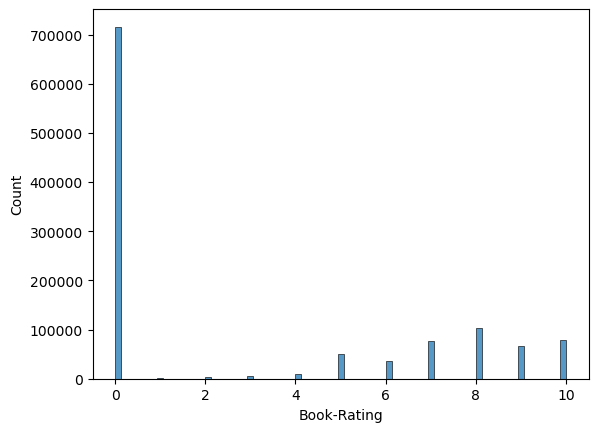

In [15]:
sns.histplot(ratings["Book-Rating"])

### Popular books

In [46]:
def books_with_avg_ratings_df(books, ratings):
    """ 
    Merge books and ratings dataframes on ISBN column and calculate average ratings.
    
    Args:
        books (pd.DataFrame): DataFrame containing books data with a column 'ISBN'.
        ratings (pd.DataFrame): DataFrame containing ratings data with columns 'ISBN' and 'Book-Rating'.

    Returns:
        pd.DataFrame: DataFrame containing books data with the number of ratings and average ratings.
    """
    ratings = ratings[ratings["Book-Rating"] != 0]
    book_stats = ratings.groupby('ISBN').agg({
        'Book-Rating': ['count', 'mean']
    }).reset_index()
    book_stats.columns = ['ISBN', 'num_ratings', 'avg_rating']    
    books_with_ratings = pd.merge(books, book_stats, on='ISBN', how="left").fillna(value={"num_ratings": 0, "avg_rating": 0})
    return books_with_ratings

In [48]:
books_with_ratings = books_with_avg_ratings_df(books, ratings)
books_with_ratings.head()

,ISBN,title,author,year,publisher,image_url,num_ratings,avg_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0.0,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,9.0,7.666667
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,2.0,7.500000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,6.0,7.833333
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,0.0,0.000000


In [ ]:
def get_popular_books(books_df, n=10):
    """
    Get the top n popular books based on the number of ratings and average rating.

    Args:
        books_df (pd.DataFrame): DataFrame containing books data with the number of ratings and average ratings.
        n (int): Number of popular books to return.

    Returns:
        pd.DataFrame: DataFrame containing the top n popular books with their ratings and average rating.
    """
    popular_books = books_df[books_df["num_ratings"] > 250].sort_values('avg_rating', ascending=False)
    return popular_books.head(n)

In [50]:
get_popular_books(books_with_ratings)

,ISBN,title,author,year,publisher,image_url,num_ratings,avg_rating
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,313.0,8.939297
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,307.0,8.452769
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,487.0,8.435318
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,707.0,8.185290
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,383.0,8.182768
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,295.0,8.142373
118,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,269.0,8.100372
231,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,278.0,7.982014
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,320.0,7.887500
1922,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,256.0,7.808594


### Books by author

In [ ]:
def get_books_by_author(author, books_df, exclude_isbns=[], n=5):
    """ 
    Get books by a specific author, excluding certain ISBNs.

    Args:
        author (str): Name of the author.
        books_df (pd.DataFrame): DataFrame containing books data and their ratings.
        exclude_isbns (list): List of ISBNs to exclude from the results.
        n (int): Number of books to return.

    Returns:
        pd.DataFrame: DataFrame containing books by the specified author, sorted by the number of ratings.
    """
    books_by_author = books_df[(books_df['author']==author) & 
                               (~books_df['ISBN'].isin(exclude_isbns))]
    return books_by_author.sort_values("num_ratings", ascending=False).head(n)

In [67]:
get_books_by_author("J. K. Rowling", books_with_ratings)

,ISBN,title,author,year,publisher,image_url,num_ratings,avg_rating
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,313.0,8.939297
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,206.0,9.033981
3459,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,189.0,8.783069
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,141.0,9.035461
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,137.0,9.262774
